In [ ]:
!unzip "/content/face_images.zip" -d "/content/data"

In [ ]:
!unzip "/content/ColorfulOriginal.zip" -d "/content/data"

In [ ]:
import cv2
import tensorflow as tf
import os
import numpy as np

In [ ]:
def buildFacesData():
  faces_dataset = []
  L_faces_dataset = []

  for i in os.listdir("/content/data/face_images"):
    if(i[-4:] == ".jpg"):
      img = cv2.imread("/content/data/face_images/" + i)
      faces_dataset.append(img)
      imgLAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

      L, a, b = cv2.split(imgLAB)
      L_faces_dataset.append(L)

  L_faces_dataset = np.array(L_faces_dataset).reshape((750, 1, 128, 128))
  L_faces_dataset = L_faces_dataset / 255
  return L_faces_dataset, faces_dataset

In [ ]:
def buildColorfulData():
  images = []
  L_images = []

  for i in os.listdir("/content/data/ColorfulOriginal"):
    for j in os.listdir("/content/data/ColorfulOriginal/" + i):
      if(j[-4:] == ".jpg"):
        img = cv2.imread("/content/data/ColorfulOriginal/" + i + "/" + j)
        img = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
        images.append(img)
        imgLAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        L, a, b = cv2.split(imgLAB)
        L_images.append(L)
  L_images = np.array(L_images).reshape((721, 1, 128, 128))
  L_images = L_images / 255
  return L_images, images

In [ ]:
from tensorflow.keras.models import load_model

def avg_psnr(modelpath, input_data, real_data):
  model = load_model(modelpath)
  prediction = model.predict(input_data)
  psnr = 0
  for i in range(750):
    a = prediction[i][0]
    b = prediction[i][1]
    L = input_data[i].reshape(128,128)
    L = np.array(L * 255, dtype = np.uint8)
    a = np.array(a * 255, dtype = np.uint8)
    b = np.array(b * 255, dtype = np.uint8)
    imgLAB = cv2.merge([L, a, b])
    image = cv2.cvtColor(imgLAB, cv2.COLOR_LAB2RGB)
    psnr += tf.image.psnr(image, real_data[i], max_val = 255).numpy()
    
  print("AVERAGE PSNR OF PREDICTION : " , round(psnr / 750, 3))

In [195]:
def avg_psnr(modelpath, input_data, real_data, dataName, modelName, modelNo):
  model = tf.keras.models.load_model(modelpath)
  prediction = model.predict(input_data)
  psnr = 0
  for i in range(len(real_data)):
    a = prediction[i][0]
    b = prediction[i][1]
    L = input_data[i].reshape(128,128)
    L = np.array(L * 255, dtype = np.uint8)
    if(modelNo == 0):
      a = np.array(a * 255, dtype = np.uint8)
      b = np.array(b * 255, dtype = np.uint8)
    elif(modelNo == 1):
      a = np.array(a * 51, dtype = np.uint8)
      b = np.array(b * 51, dtype = np.uint8)
      a = a + 144
      b = b + 144
    elif(modelNo == 2):
      a = np.array(a * 127, dtype = np.uint8)
      b = np.array(b * 127, dtype = np.uint8)
      a = a + 128
      b = b + 128

    imgLAB = cv2.merge([L, a, b])
    image = cv2.cvtColor(imgLAB, cv2.COLOR_LAB2BGR)
    psnr += tf.image.psnr(image, real_data[i], max_val = 255).numpy()
    
  print("Average PSNR of prediction of ", modelName, " on ", dataName, " : " , round(psnr / 750, 3))
  avg = round(psnr / 750, 3)
  return avg

In [196]:
def avg_ssim(modelpath, input_data, real_data, dataName, modelName, modelNo):
  model = tf.keras.models.load_model(modelpath)
  prediction = model.predict(input_data)
  ssim = 0
  for i in range(len(real_data)):
    a = prediction[i][0]
    b = prediction[i][1]
    L = input_data[i].reshape(128,128)
    L = np.array(L * 255, dtype = np.uint8)
    if(modelNo == 0):
      a = np.array(a * 255, dtype = np.uint8)
      b = np.array(b * 255, dtype = np.uint8)
    elif(modelNo == 1):
      a = np.array(a * 51, dtype = np.uint8)
      b = np.array(b * 51, dtype = np.uint8)
      a = a + 144
      b = b + 144
    elif(modelNo == 2):
      a = np.array(a * 127, dtype = np.uint8)
      b = np.array(b * 127, dtype = np.uint8)
      a = a + 128
      b = b + 128

    imgLAB = cv2.merge([L, a, b])
    image = cv2.cvtColor(imgLAB, cv2.COLOR_LAB2BGR)
    ssim += tf.image.ssim(image, real_data[i], max_val = 255).numpy()
    
  print("Average SSIM of prediction of ", modelName, " on ", dataName, " : " , round(ssim / 750, 3))
  avg = round(ssim / 750, 3)
  return avg

In [197]:
input_data_faces, real_data_faces = buildFacesData()
input_data_colorful, real_data_colorful = buildColorfulData()

In [198]:
faces_psnr = []
faces_ssim = []
faces_psnr.append(avg_psnr("/content/ColorizerModelFinal.h5", input_data_faces, real_data_faces, "Faces Dataset", "Final Colorizer Model", 0))
faces_psnr.append(avg_psnr("/content/ColorizerModelFinalTanh.h5", input_data_faces, real_data_faces, "Faces Dataset", "Final Colorizer Model with Tanh", 1))
faces_psnr.append(avg_psnr("/content/ColorizerModelFinalTranferLearning.h5", input_data_faces, real_data_faces, "Faces Dataset", "Final Transfer Learning Colorizer Model", 0))
faces_psnr.append(avg_psnr("/content/ColorizerModelFinalTranferLearningTanh.h5", input_data_faces, real_data_faces, "Faces Dataset", "Final Transfer Learning Colorizer Model With Tanh", 2))
faces_ssim.append(avg_ssim("/content/ColorizerModelFinal.h5", input_data_faces, real_data_faces, "Faces Dataset", "Final Colorizer Model", 0))
faces_ssim.append(avg_ssim("/content/ColorizerModelFinalTanh.h5", input_data_faces, real_data_faces, "Faces Dataset", "Final Colorizer Model with Tanh", 1))
faces_ssim.append(avg_ssim("/content/ColorizerModelFinalTranferLearning.h5", input_data_faces, real_data_faces, "Faces Dataset", "Final Transfer Learning Colorizer Model", 0))
faces_ssim.append(avg_ssim("/content/ColorizerModelFinalTranferLearningTanh.h5", input_data_faces, real_data_faces, "Faces Dataset", "Final Transfer Learning Colorizer Model With Tanh", 2))

24/24 [==============================] - 0s 8ms/step
Average PSNR of prediction of  Final Colorizer Model  on  Faces Dataset  :  30.055
24/24 [==============================] - 1s 10ms/step
Average PSNR of prediction of  Final Colorizer Model with Tanh  on  Faces Dataset  :  33.878
24/24 [==============================] - 1s 9ms/step
Average PSNR of prediction of  Final Transfer Learning Colorizer Model  on  Faces Dataset  :  24.099
24/24 [==============================] - 0s 8ms/step
Average PSNR of prediction of  Final Transfer Learning Colorizer Model With Tanh  on  Faces Dataset  :  21.277
24/24 [==============================] - 0s 8ms/step
Average SSIM of prediction of  Final Colorizer Model  on  Faces Dataset  :  0.973
24/24 [==============================] - 1s 9ms/step
Average SSIM of prediction of  Final Colorizer Model with Tanh  on  Faces Dataset  :  0.977
24/24 [==============================] - 0s 8ms/step
Average SSIM of prediction of  Final Transfer Learning Colorizer M

In [199]:
color_psnr = []
color_ssim = []
color_psnr.append(avg_psnr("/content/ColorizerModelFinal.h5", input_data_colorful, real_data_colorful, "ColorFul Original Dataset", "Final Colorizer Model", 0))
color_psnr.append(avg_psnr("/content/ColorizerModelFinalTanh.h5", input_data_colorful, real_data_colorful, "ColorFul Original Dataset", "Final Colorizer Model with Tanh", 1))
color_psnr.append(avg_psnr("/content/ColorizerModelFinalTranferLearning.h5", input_data_colorful, real_data_colorful, "ColorFul Original Dataset", "Final Transfer Learning Colorizer Model", 0))
color_psnr.append(avg_psnr("/content/ColorizerModelFinalTranferLearningTanh.h5", input_data_colorful, real_data_colorful, "ColorFul Original Dataset", "Final Transfer Learning Colorizer Model With Tanh", 2))
color_ssim.append(avg_ssim("/content/ColorizerModelFinal.h5", input_data_colorful, real_data_colorful, "ColorFul Original Dataset", "Final Colorizer Model", 0))
color_ssim.append(avg_ssim("/content/ColorizerModelFinalTanh.h5", input_data_colorful, real_data_colorful, "ColorFul Original Dataset", "Final Colorizer Model with Tanh", 1))
color_ssim.append(avg_ssim("/content/ColorizerModelFinalTranferLearning.h5", input_data_colorful, real_data_colorful, "ColorFul Original Dataset", "Final Transfer Learning Colorizer Model", 0))
color_ssim.append(avg_ssim("/content/ColorizerModelFinalTranferLearningTanh.h5", input_data_colorful, real_data_colorful, "ColorFul Original Dataset", "Final Transfer Learning Colorizer Model With Tanh", 2))

23/23 [==============================] - 0s 9ms/step
Average PSNR of prediction of  Final Colorizer Model  on  ColorFul Original Dataset  :  17.26
23/23 [==============================] - 0s 8ms/step
Average PSNR of prediction of  Final Colorizer Model with Tanh  on  ColorFul Original Dataset  :  17.488
23/23 [==============================] - 0s 8ms/step
Average PSNR of prediction of  Final Transfer Learning Colorizer Model  on  ColorFul Original Dataset  :  20.9
23/23 [==============================] - 0s 8ms/step
Average PSNR of prediction of  Final Transfer Learning Colorizer Model With Tanh  on  ColorFul Original Dataset  :  19.392
23/23 [==============================] - 0s 8ms/step
Average SSIM of prediction of  Final Colorizer Model  on  ColorFul Original Dataset  :  0.768
23/23 [==============================] - 0s 8ms/step
Average SSIM of prediction of  Final Colorizer Model with Tanh  on  ColorFul Original Dataset  :  0.831
23/23 [==============================] - 1s 8ms/ste

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
import random 

def testModel(modelpath, modelNo):
  model = tf.keras.models.load_model(modelpath)
  faces = []
  for i in os.listdir("/content/data/face_images"):
    if(i[-4:] == ".jpg"):
      faces.append("/content/data/face_images/" + i)

  colorful = []
  for i in os.listdir("/content/data/ColorfulOriginal"):
    for j in os.listdir("/content/data/ColorfulOriginal/" + i):
      if(j[-4:] == ".jpg"):
        colorful.append("/content/data/ColorfulOriginal/" + i + "/" + j)

  imgs = []
  for i in range(5):
    img = cv2.imread(random.choice(faces))
    imgs.append(img)

  for i in range(5):
    img = cv2.imread(random.choice(colorful))
    img = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
    imgs.append(img)

  L_images = []
  for i in imgs:
    imgLAB = cv2.cvtColor(i, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(imgLAB)
    L_images.append(L)
  L_images = np.array(L_images)
  L_images = L_images / 255
  L_images = L_images.reshape(10, 1, 128, 128)

  prediction = model.predict(L_images)
  pred_img = []
  for i in range(10):
    a = prediction[i][0]
    b = prediction[i][1]
    L = L_images[i].reshape(128,128)
    L = np.array(L * 255, dtype = np.uint8)
    if(modelNo == 0):
      a = np.array(a * 255, dtype = np.uint8)
      b = np.array(b * 255, dtype = np.uint8)
      
    elif(modelNo == 1):
      a = np.array(a * 51, dtype = np.uint8)
      b = np.array(b * 51, dtype = np.uint8)
      a = a + 144
      b = b + 144
    elif(modelNo == 2):
      a = np.array(a * 127, dtype = np.uint8)
      b = np.array(b * 127, dtype = np.uint8)
      a = a + 128
      b = b + 128
    imgLAB = cv2.merge([L, a, b])
    image = cv2.cvtColor(imgLAB, cv2.COLOR_LAB2BGR)
    pred_img.append(image)
    
  
  figs, axs = plt.subplots(5, 6, figsize=(15, 15))

  for i in range(5):
    axs[i, 0].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
    axs[i, 0].axis("off")
    axs[i, 1].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2GRAY), cmap='gray')
    axs[i, 1].axis("off")
    axs[i, 2].imshow(cv2.cvtColor(pred_img[i], cv2.COLOR_BGR2RGB))
    axs[i, 2].axis("off")

    axs[i, 3].imshow(cv2.cvtColor(imgs[i + 5], cv2.COLOR_BGR2RGB))
    axs[i, 3].axis("off")
    axs[i, 4].imshow(cv2.cvtColor(imgs[i + 5], cv2.COLOR_BGR2GRAY), cmap = 'gray')
    axs[i, 4].axis("off")
    axs[i, 5].imshow(cv2.cvtColor(pred_img[i + 5], cv2.COLOR_BGR2RGB))
    axs[i, 5].axis("off")
  

1/1 [==============================] - 0s 319ms/step


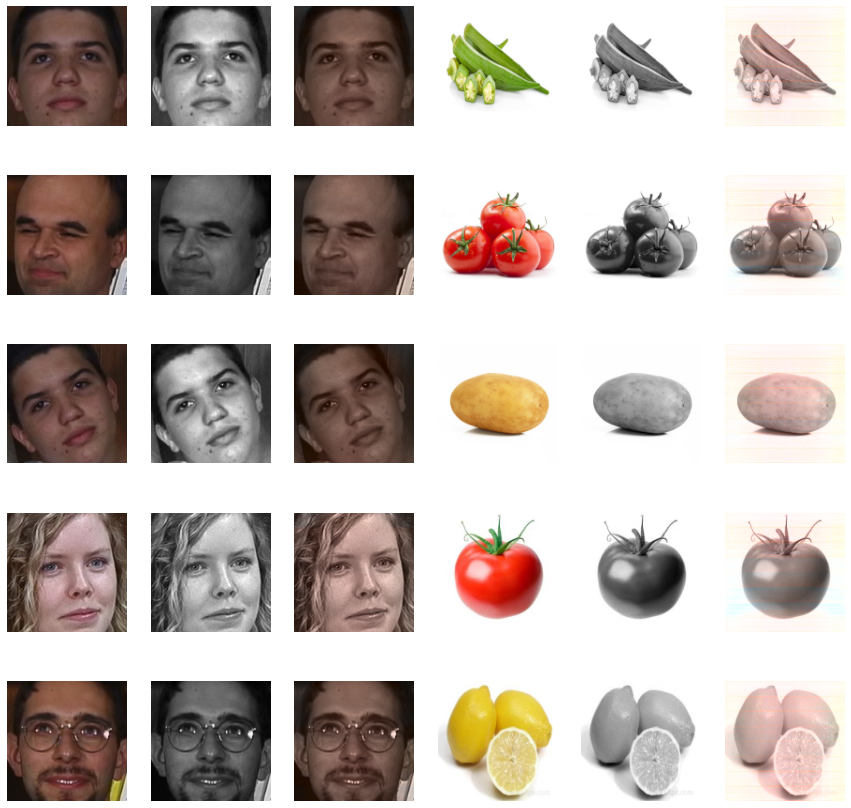

In [ ]:
testModel("/content/ColorizerModelFinal.h5", 0)

1/1 [==============================] - 0s 313ms/step


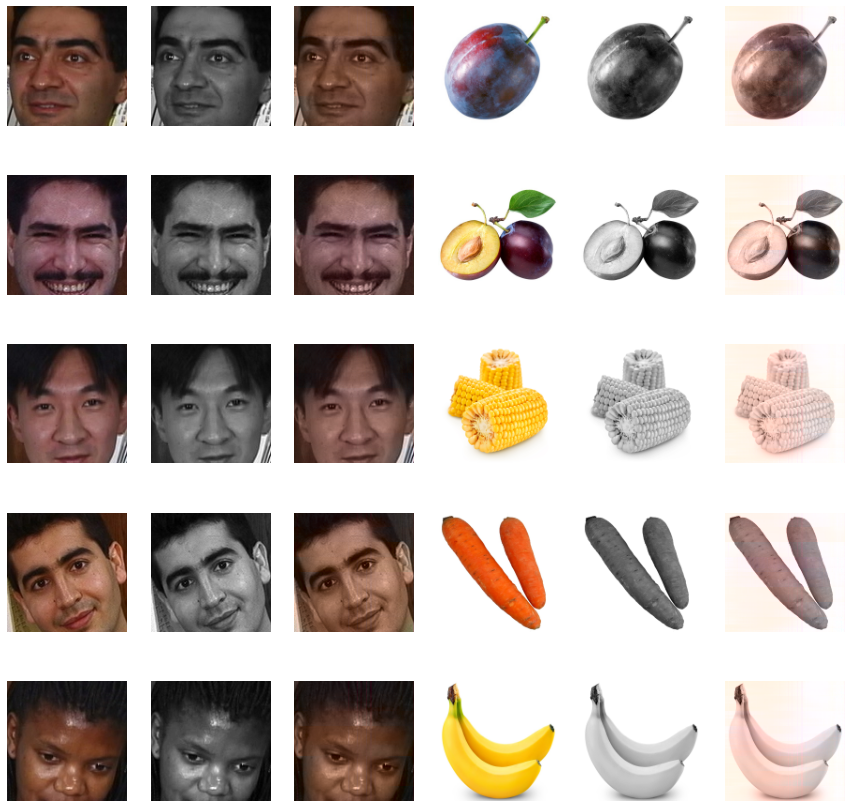

In [ ]:
testModel("/content/ColorizerModelFinalTanh.h5", 1)

1/1 [==============================] - 0s 324ms/step


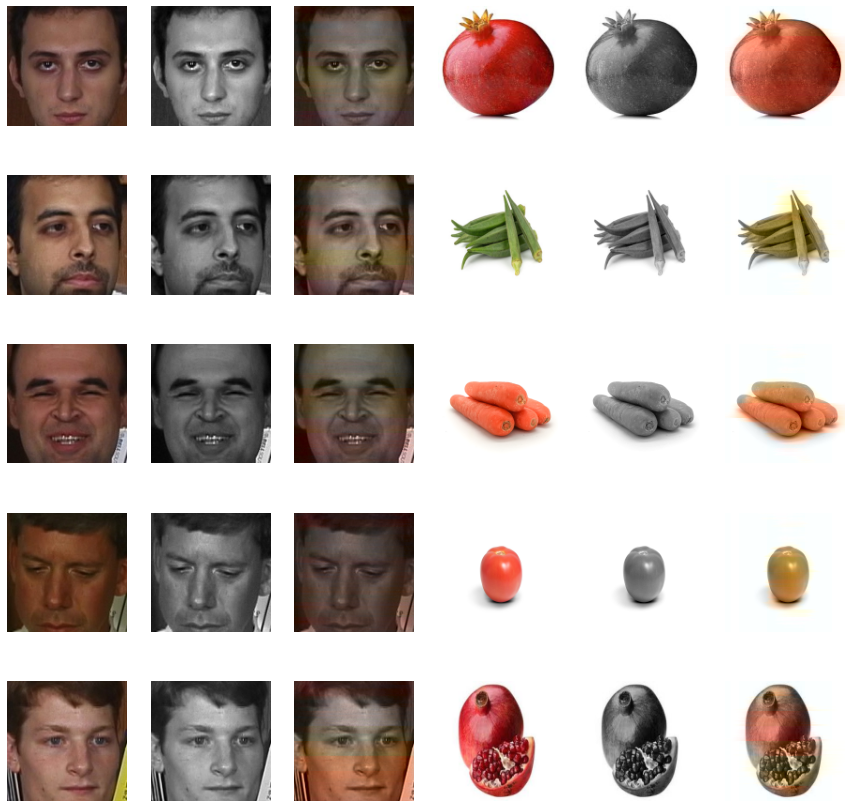

In [ ]:
testModel("/content/ColorizerModelFinalTranferLearning.h5", 0)

1/1 [==============================] - 0s 308ms/step


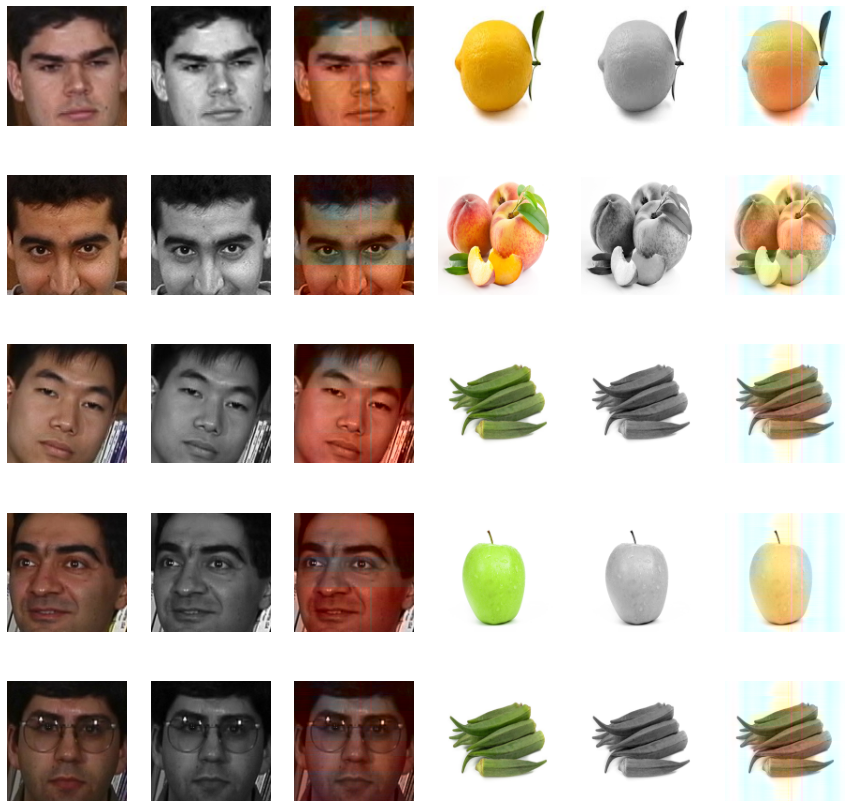

In [ ]:
testModel("/content/ColorizerModelFinalTranferLearningTanh.h5", 2)

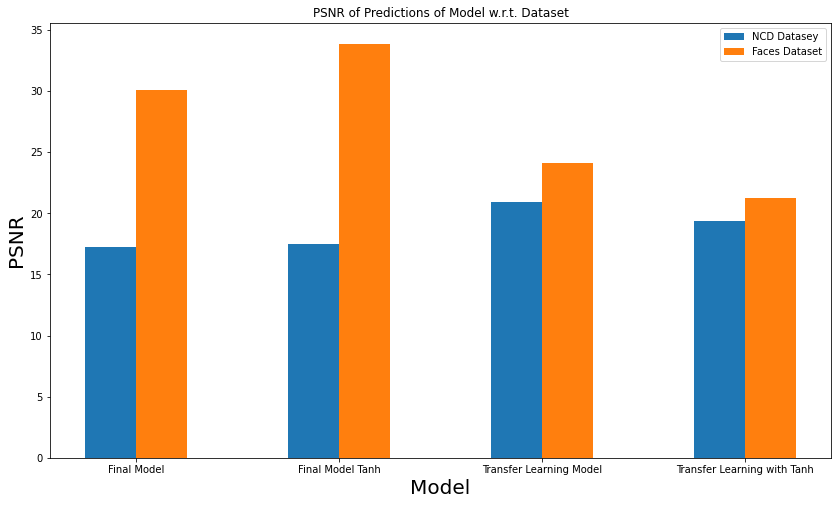

In [220]:
labels = ['Final Model', 'Final Model Tanh', 'Transfer Learning Model', 'Transfer Learning with Tanh']
n = 4
r = np.arange(n)
width = 0.25
  
plt.figure(figsize=(14, 8))
plt.bar(r, color_psnr, width = width, label='NCD Datasey')
plt.bar(r + width, faces_psnr, width = width, label='Faces Dataset')
  
plt.xlabel("Model", fontsize=20)
plt.ylabel("PSNR", fontsize=20)
plt.title("PSNR of Predictions of Model w.r.t. Dataset")
plt.xticks(r + width/2,labels)
plt.legend()
  
plt.show()

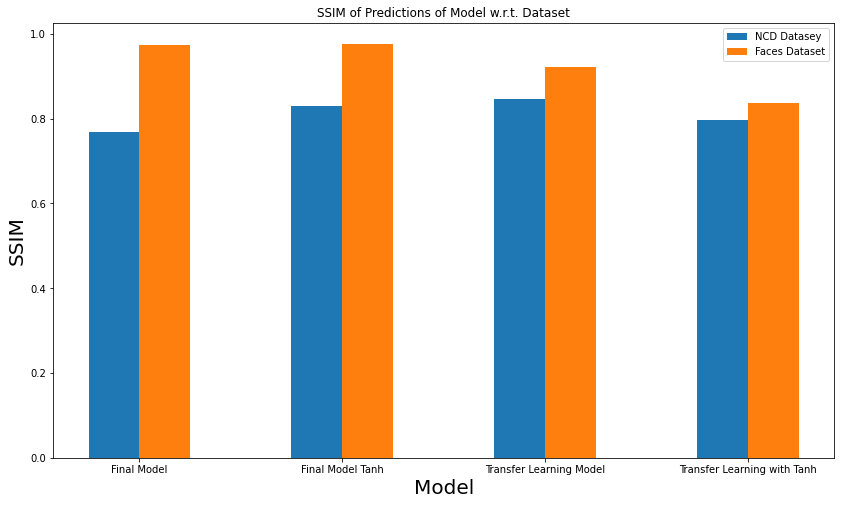

In [221]:
labels = ['Final Model', 'Final Model Tanh', 'Transfer Learning Model', 'Transfer Learning with Tanh']
n = 4
r = np.arange(n)
width = 0.25
  
plt.figure(figsize=(14, 8))
plt.bar(r, color_ssim, width = width, label='NCD Datasey')
plt.bar(r + width, faces_ssim, width = width, label='Faces Dataset')
  
plt.xlabel("Model", fontsize=20)
plt.ylabel("SSIM", fontsize=20)
plt.title("SSIM of Predictions of Model w.r.t. Dataset")
  

plt.xticks(r + width/2,labels)
plt.legend()
  
plt.show()